In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import requests

import warnings
warnings.filterwarnings("ignore")

In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

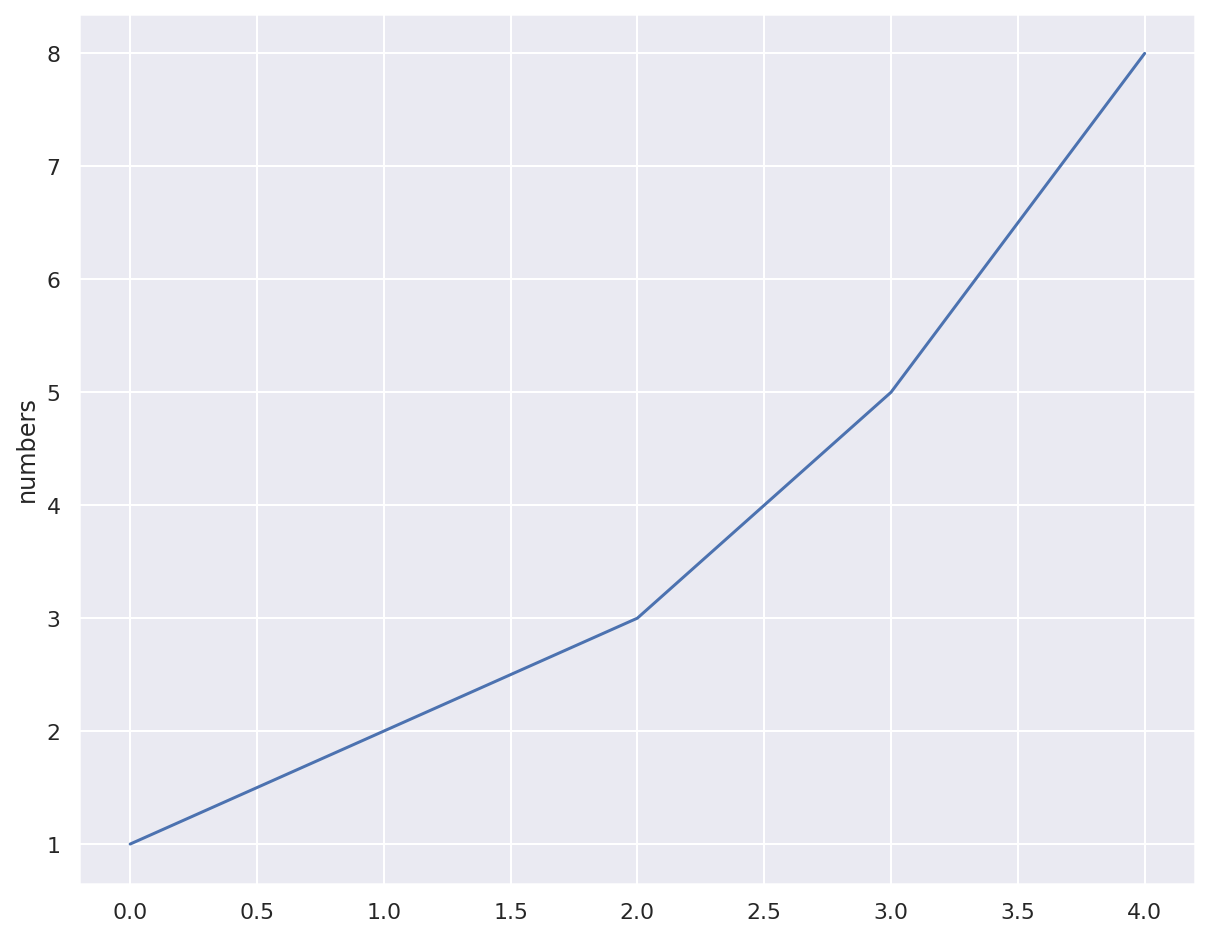

In [35]:
plt.plot([1, 2, 3, 5 ,8])
plt.ylabel("numbers")
plt.show()

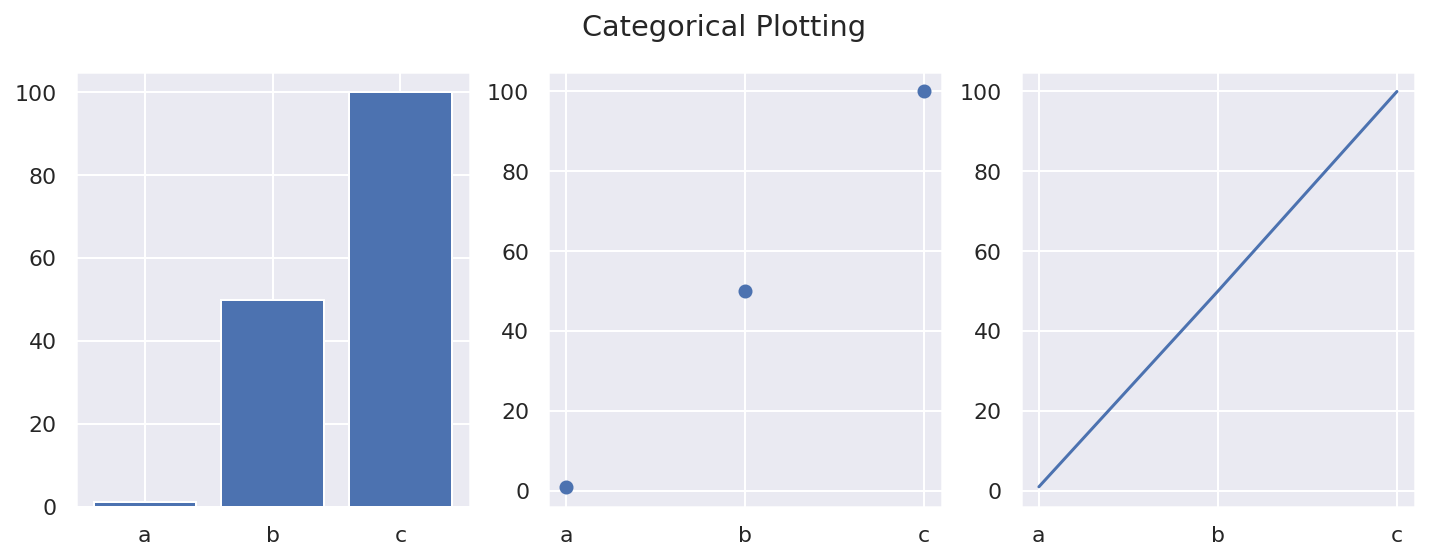

In [36]:
# subplot
alphabet = ["a", "b", "c"]
values = [1, 50, 100]

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.bar(alphabet, values)

plt.subplot(1,3,2)
plt.scatter(alphabet, values)

plt.subplot(1,3,3)
plt.plot(alphabet, values)

plt.suptitle("Categorical Plotting")
plt.show()

In [37]:
data = pd.read_csv("BIPA_data.csv", index_col=0)

In [38]:
# 일부 챔피언에 대한 평균값 정보 (10개가 아닌 9개의 챔피언 id 0은 없음)
data1_10 = data[data['championId'].isin(range(0,10))]
group1_10 = data1_10.groupby("championId", as_index=False).mean()

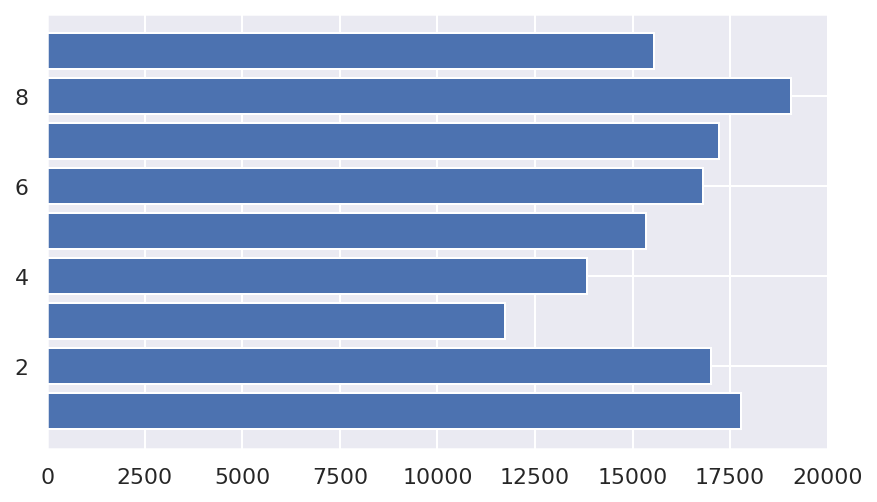

In [39]:
# 챔피언별 총 딜량
fig, ax = plt.subplots(figsize=(7,4))

ax.barh(group1_10['championId'], group1_10['totalDamageDealtToChampions'])
fig.show()

In [40]:
# 각 버전 (챔피언, 룬, 아이템 등..)
champ_ver = requests.get('https://ddragon.leagueoflegends.com/realms/na.json').json()['n']['champion']
championJsonURL = 'http://ddragon.leagueoflegends.com/cdn/' + champ_ver + '/data/en_US/champion.json'

# 챔피언 정보 url
request = requests.get(championJsonURL)
champion_data = request.json()
champion_data.keys()

dict_keys(['type', 'format', 'version', 'data'])

In [41]:
# 챔피언 id, name 데이터 프레임
champion_dict = {}

for c_name in champion_data['data'].keys() :
    champion_dict[int(champion_data['data'][c_name]['key'])]=c_name
    
champion = pd.DataFrame.from_dict(champion_dict, orient = 'index', columns = ['champion'])

In [42]:
# merge, 챔피언 이름 추가
group1_10 = pd.merge(group1_10, champion, left_on="championId", right_index=True)

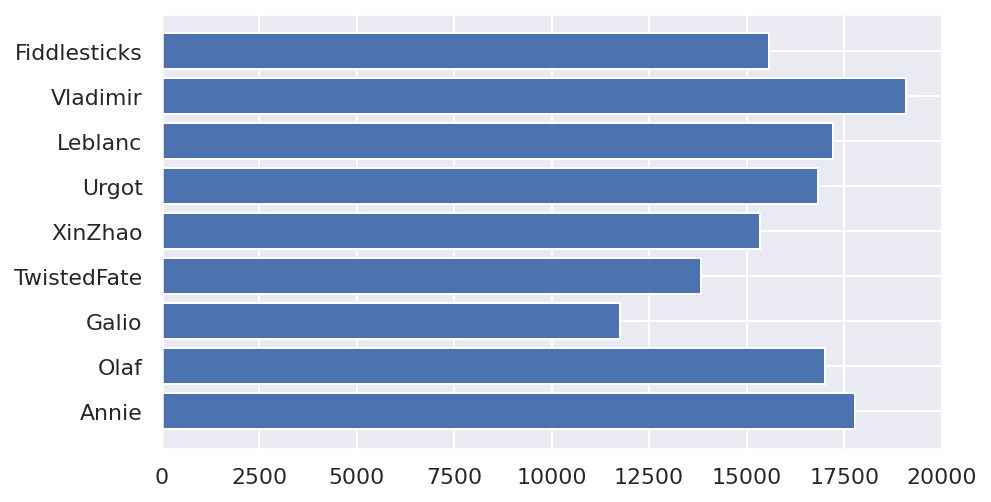

In [43]:
# 챔피언 이름으로 y축 변경
fig, ax = plt.subplots(figsize=(7,4))

ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'])
fig.show()

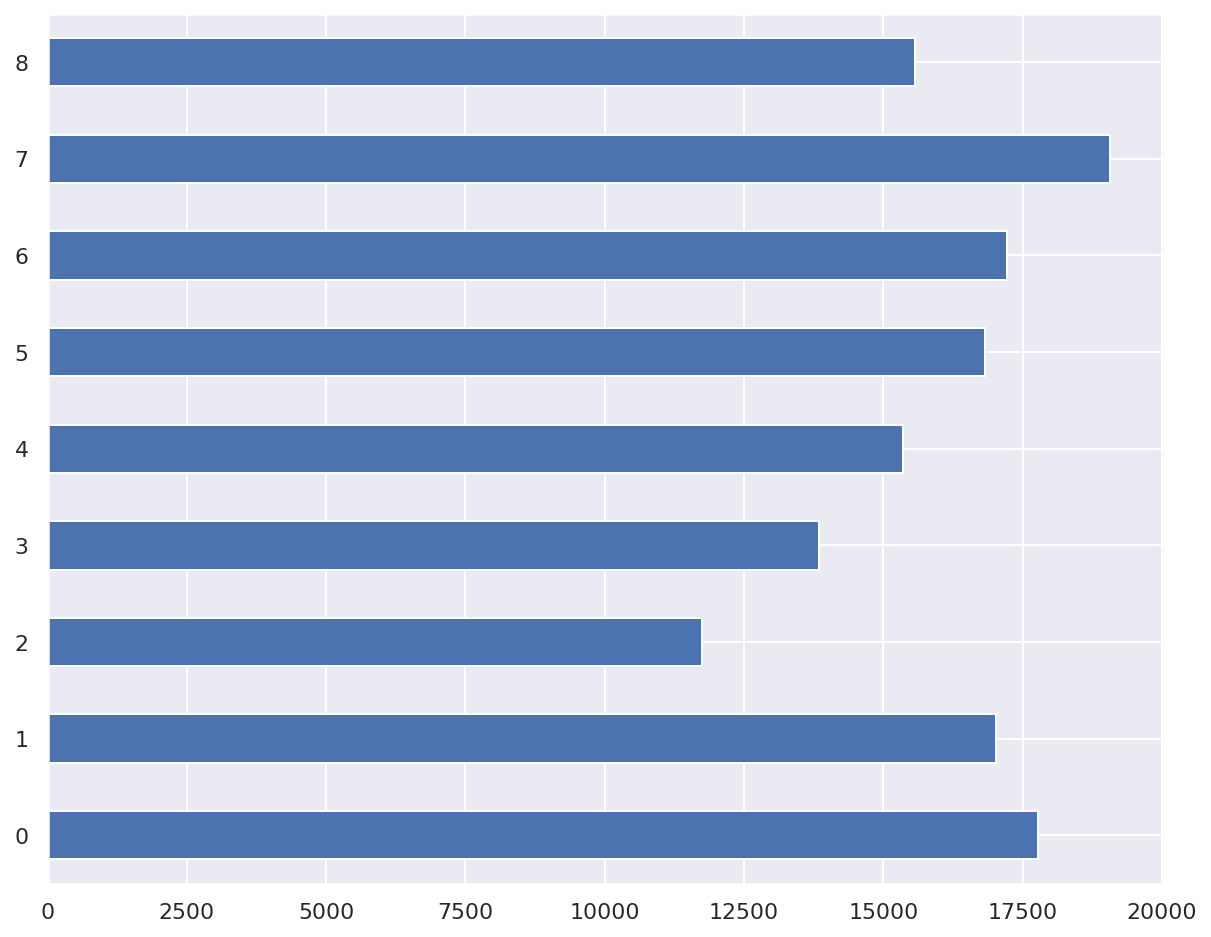

In [44]:
# pandas에서 plot
group1_10['totalDamageDealtToChampions'].plot(kind='barh')
plt.show()

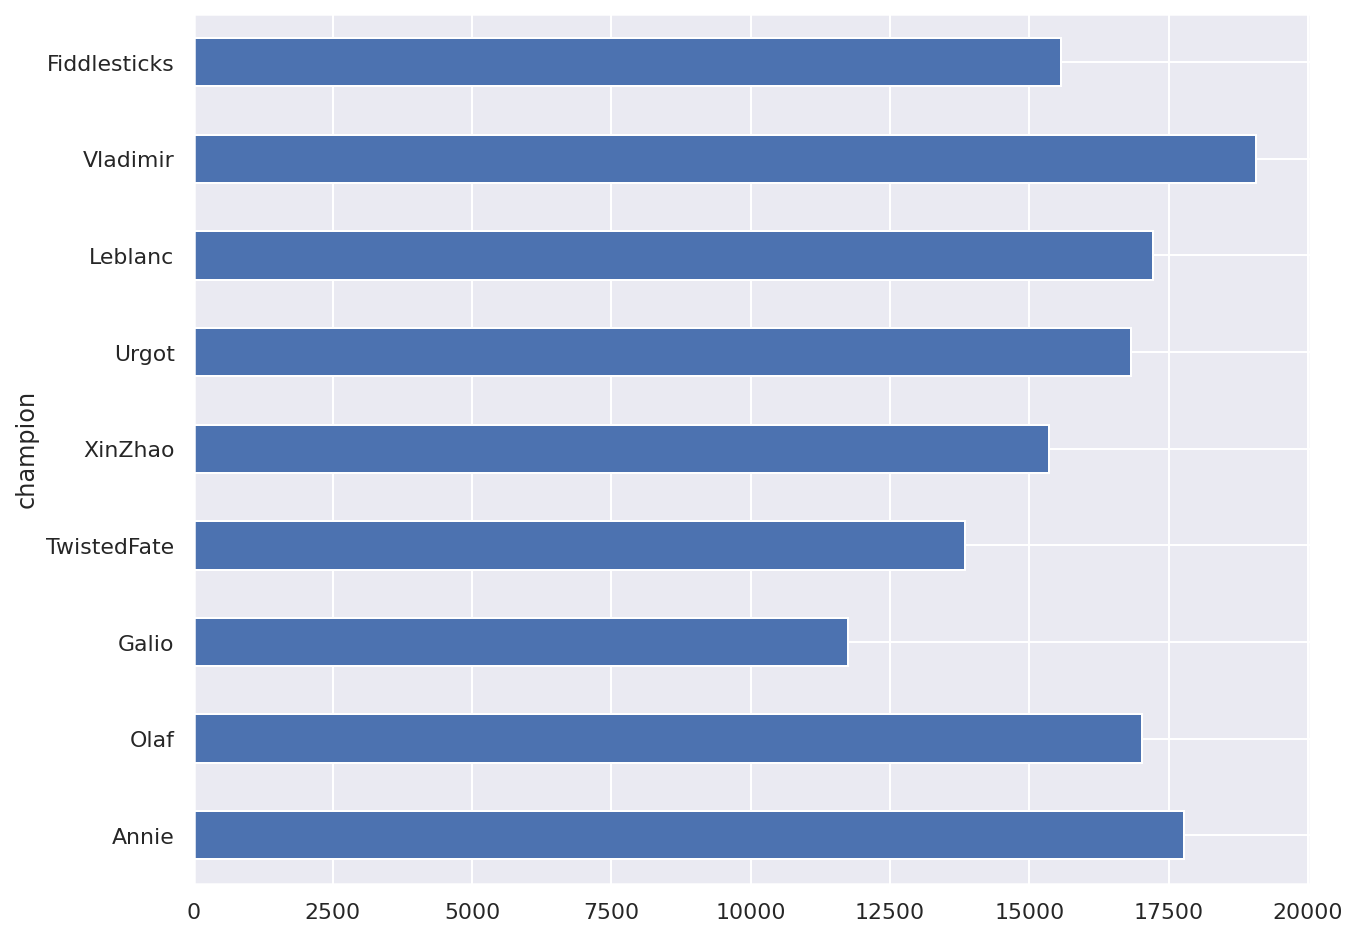

In [45]:
# index 변경
group1_10.index = group1_10.champion
group1_10['totalDamageDealtToChampions'].plot(kind='barh')
plt.show()

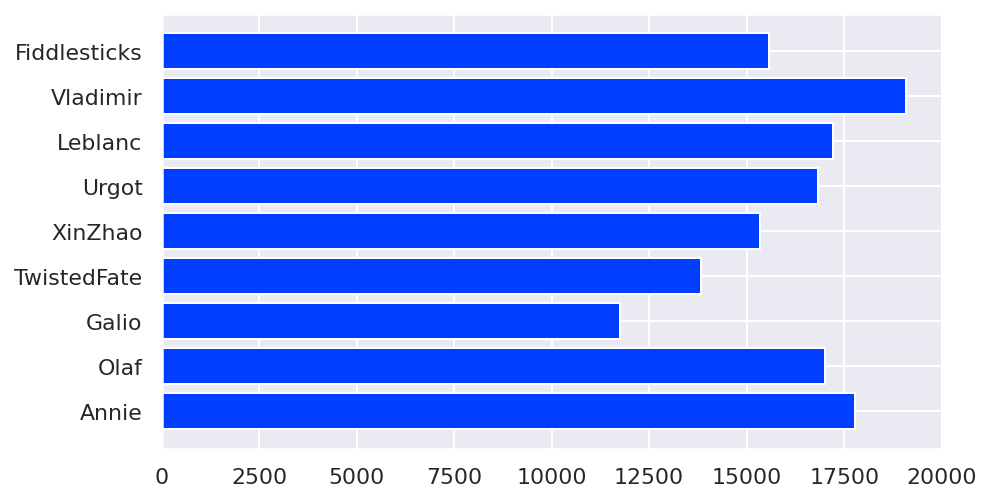

In [46]:
# color 스타일 변경 (영구)
sns.set_palette('bright')

fig, ax = plt.subplots(figsize=(7,4))

ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'])
fig.show()

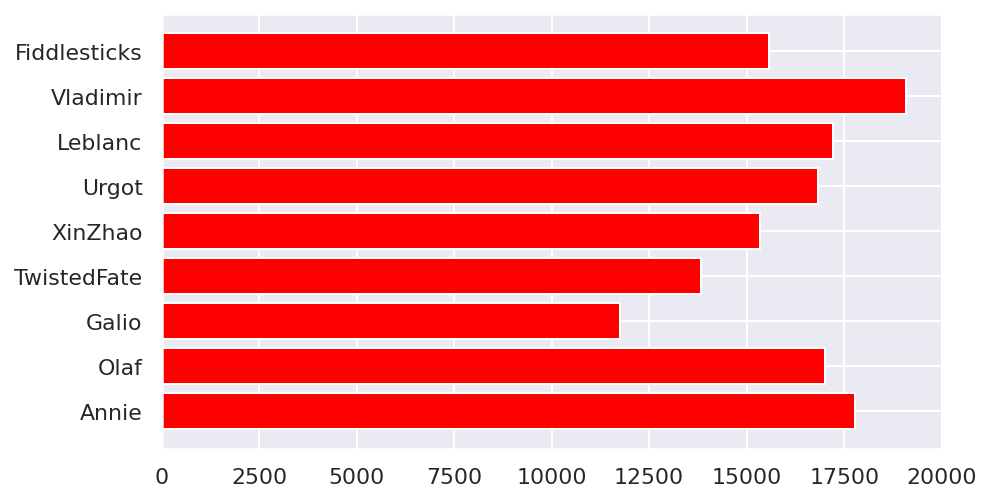

In [47]:
# color 변경
sns.set_palette('bright')

fig, ax = plt.subplots(figsize=(7,4))

ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'], color="red")
fig.show()

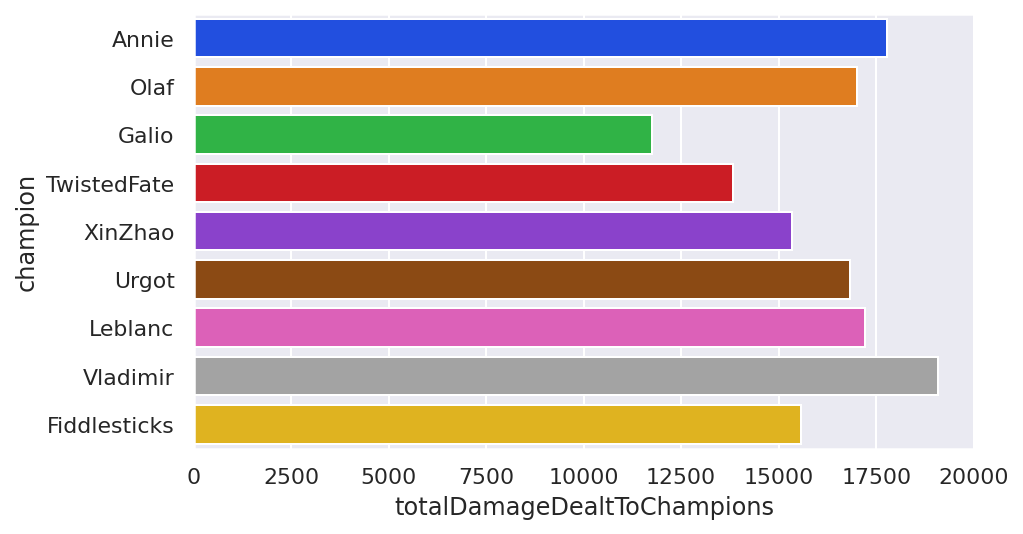

In [48]:
# seaborn
fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(data=group1_10, x='totalDamageDealtToChampions', y='champion')
plt.show()

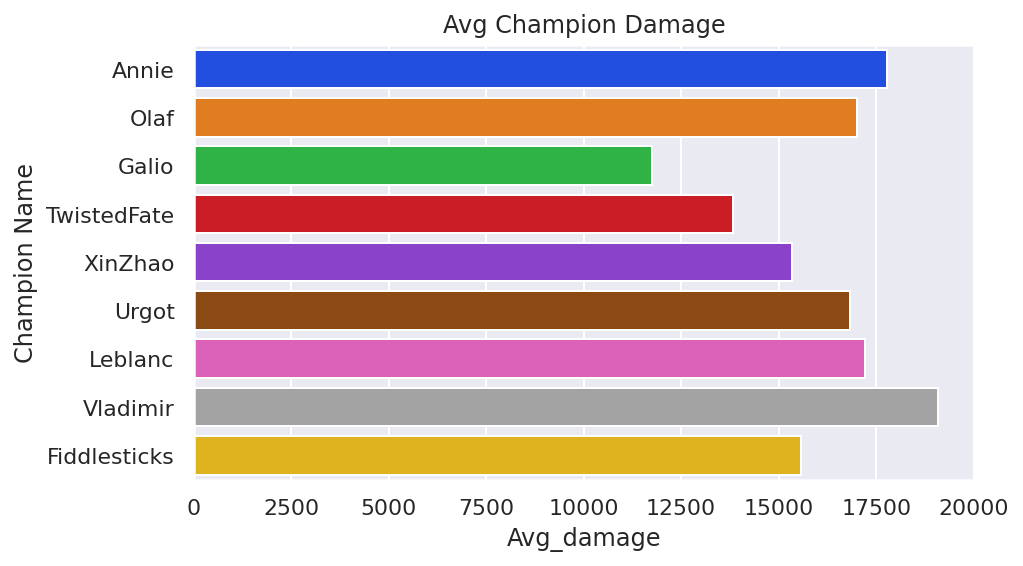

In [49]:
# xlabel, ylabel, title
fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(data=group1_10, x='totalDamageDealtToChampions', y='champion')

ax.set_xlabel("Avg_damage")
ax.set_ylabel("Champion Name")
ax.set_title("Avg Champion Damage")

plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


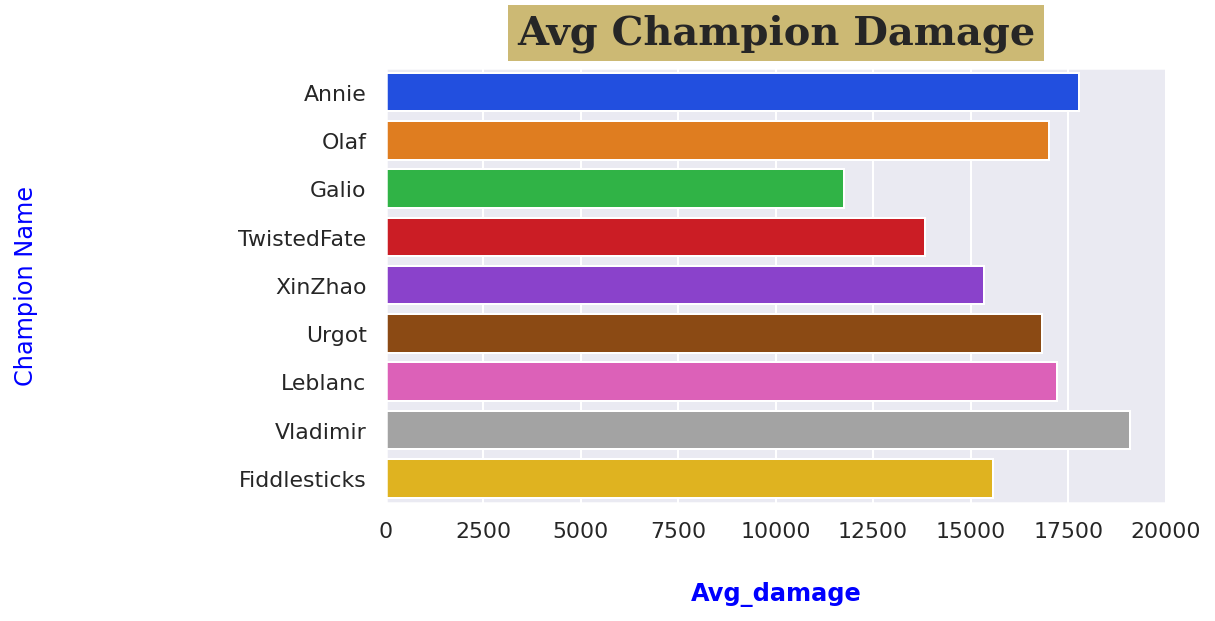

In [50]:
# font style
font_label = {
    'color': 'blue',
    'weight': 'bold'
}

font_title = {
    'family': 'serif',
    'size': 20,
    'backgroundcolor': 'y',
    'weight': 'bold',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
}

fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(data=group1_10, x='totalDamageDealtToChampions', y='champion')

# pad 옵션은 축과의 거리 옵션
ax.set_xlabel("Avg_damage", fontdict=font_label, labelpad=20)
ax.set_ylabel("Champion Name", color='blue', labelpad=100)
ax.set_title("Avg Champion Damage", fontdict=font_title, pad=12)

plt.show()

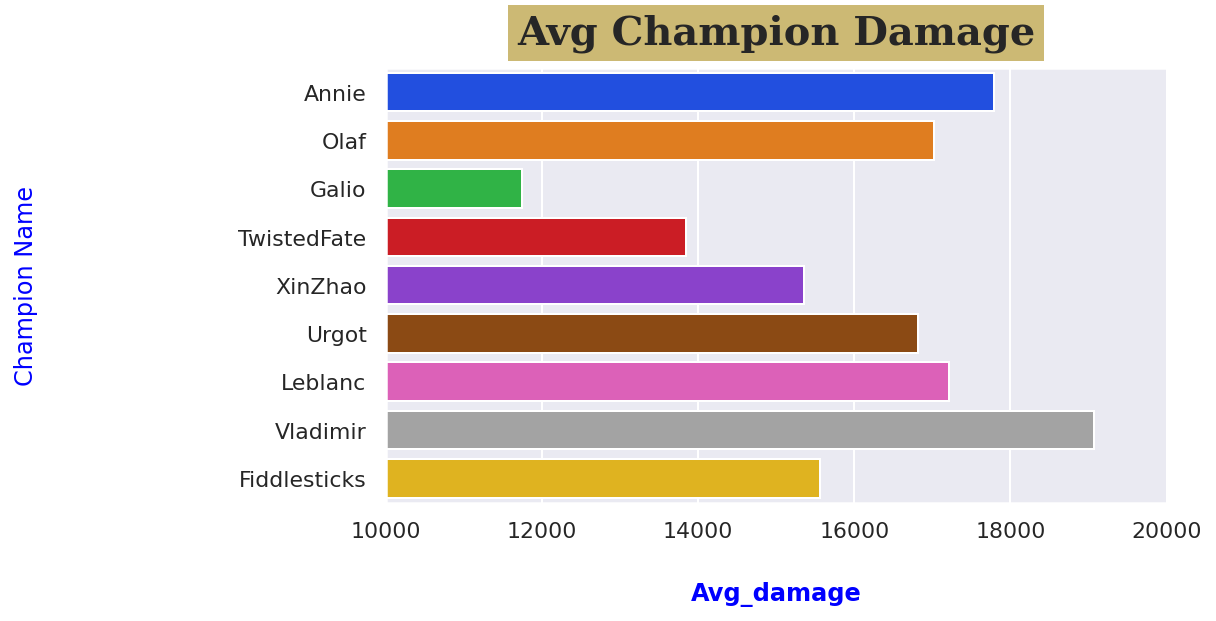

In [51]:
# font style
font_label = {
    'color': 'blue',
    'weight': 'bold'
}

font_title = {
    'family': 'serif',
    'size': 20,
    'backgroundcolor': 'y',
    'weight': 'bold',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
}

fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(data=group1_10, x='totalDamageDealtToChampions', y='champion')

# pad 옵션은 축과의 거리 옵션
ax.set_xlabel("Avg_damage", fontdict=font_label, labelpad=20)
ax.set_ylabel("Champion Name", color='blue', labelpad=100)
ax.set_title("Avg Champion Damage", fontdict=font_title, pad=12)

# x축 범위 설정
ax.set_xlim(10000, 20000)

plt.show()

NameError: name 'damage_mean' is not defined

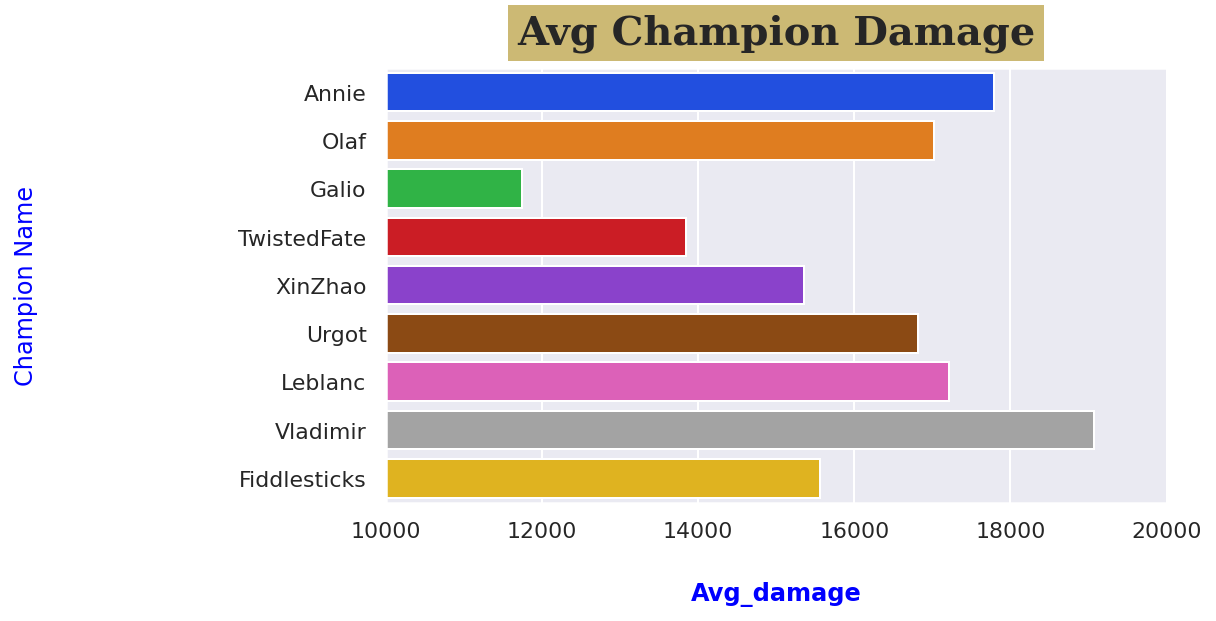

In [52]:
# font style
font_label = {
    'color': 'blue',
    'weight': 'bold'
}

font_title = {
    'family': 'serif',
    'size': 20,
    'backgroundcolor': 'y',
    'weight': 'bold',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
}

fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(data=group1_10, x='totalDamageDealtToChampions', y='champion')

# pad 옵션은 축과의 거리 옵션
ax.set_xlabel("Avg_damage", fontdict=font_label, labelpad=20)
ax.set_ylabel("Champion Name", color='blue', labelpad=100)
ax.set_title("Avg Champion Damage", fontdict=font_title, pad=12)

# x축 범위 설정
ax.set_xlim(10000, 20000)
ax.axvline(damage_mean, ls='--', lw=1, color='green')
# 평균값 선 추가해주기
damage_mean = group1_10['totalDamageDealtToChampions'].mean()
ax.axvline(damage_mean, ls='--', lw=1, color='green')

# 화살표 추가
arrowprops = {
    'arrowstyle': '->'
}
ax.annotate("average", (damage_mean, 2.5), xytext=(17000,2.5), color='green',
            fontfamily='serif', fontstyle='italic', fontsize=15, arrowprops = arrowprops)

plt.show()

In [ ]:
# boxplot
sns.boxplot(y = data['totalDamageDealtToChampions'], x = data['position'])
plt.show()

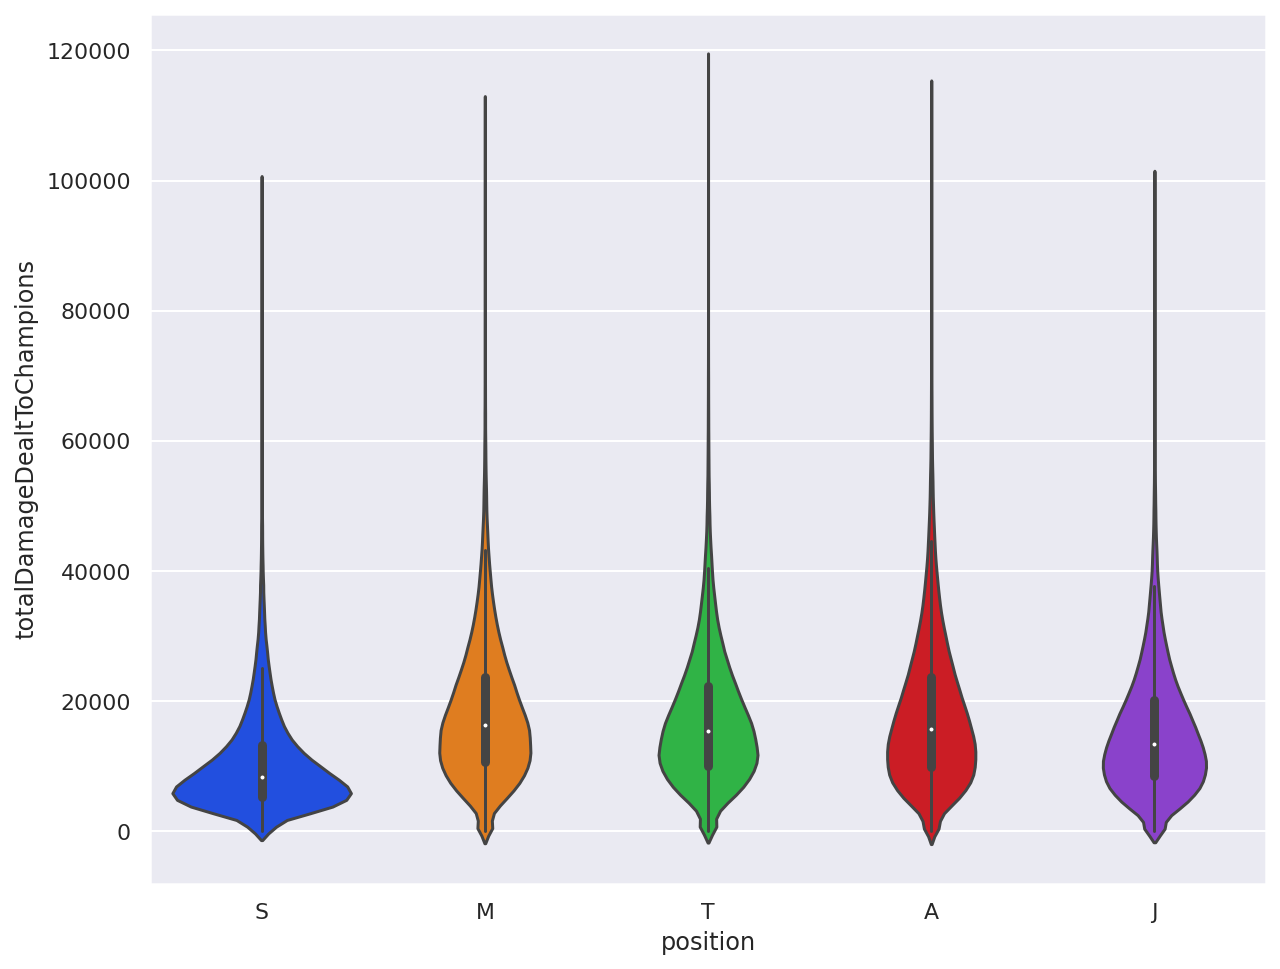

In [53]:
# boxplot
sns.violinplot(y = data['totalDamageDealtToChampions'], x = data['position'])
plt.show()

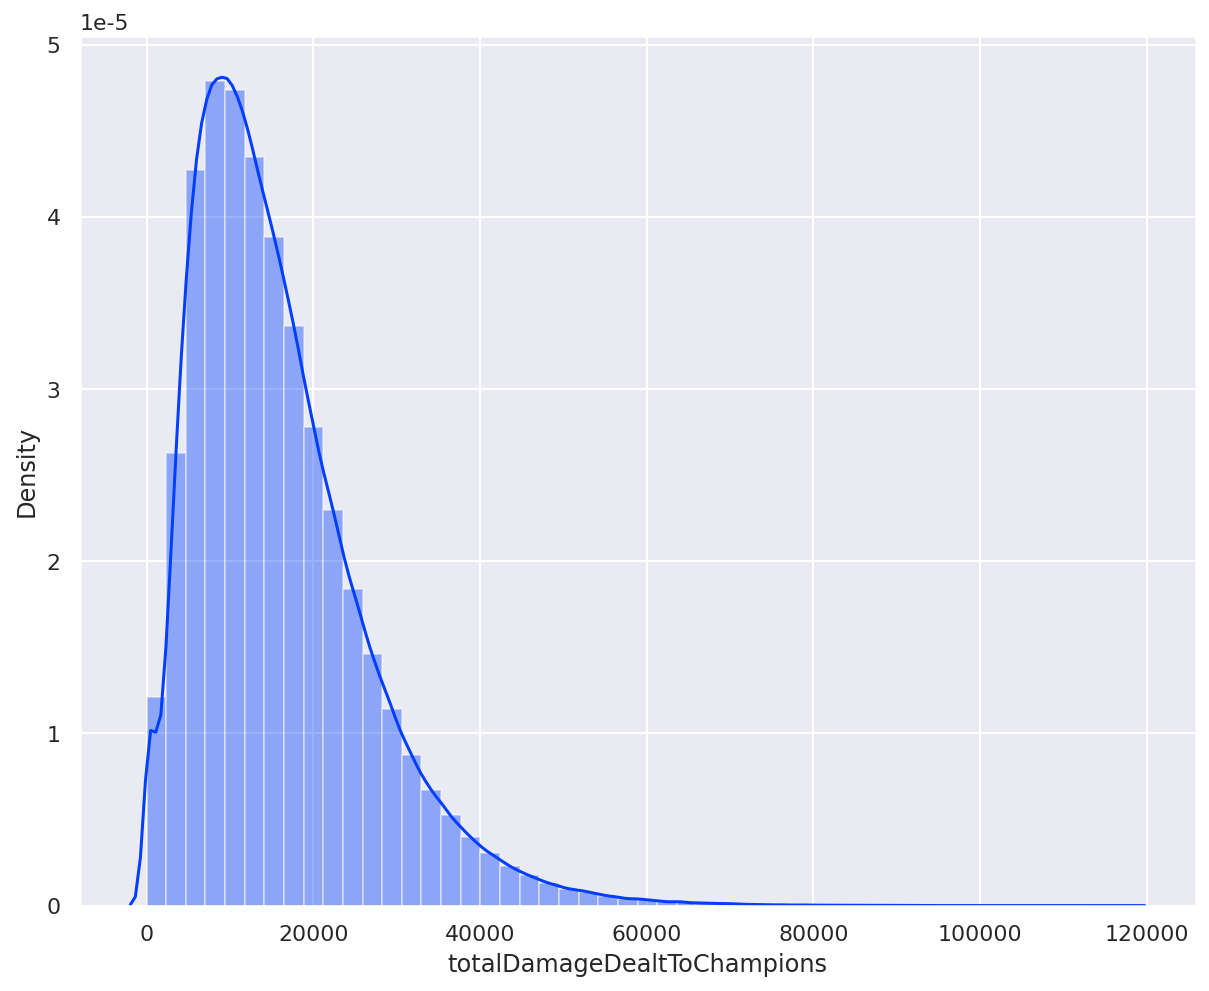

In [54]:
# distplot
sns.distplot(data['totalDamageDealtToChampions'])
plt.show()

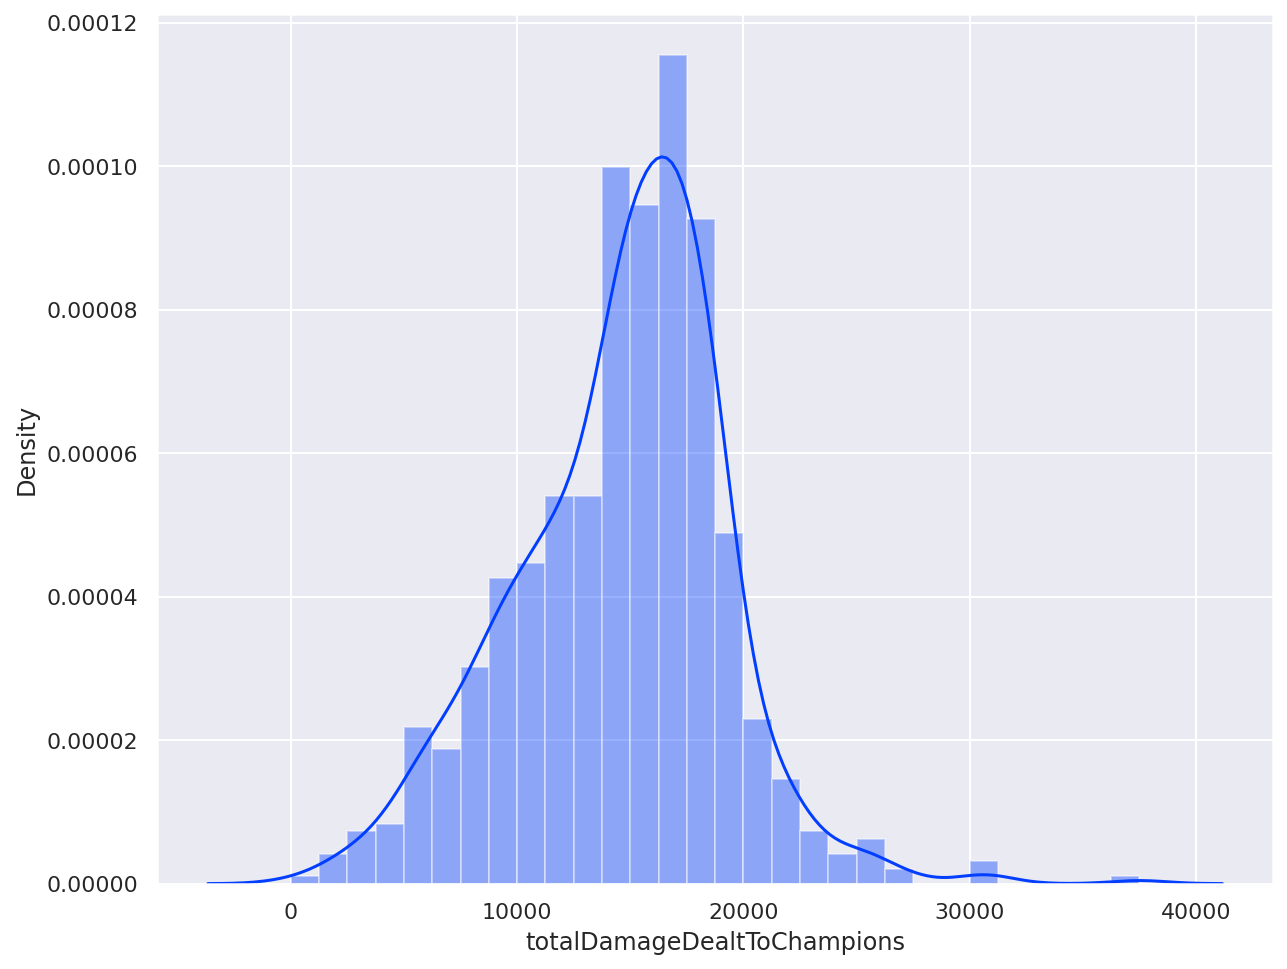

In [55]:
# distplot
group_data = data[data['gameLength']>200].groupby(['position','championId'], as_index=False).mean()
# sns.distplot(group_data, x='totalDamageDealtToChampions', hue='position')
sns.distplot(group_data['totalDamageDealtToChampions'])
plt.show()

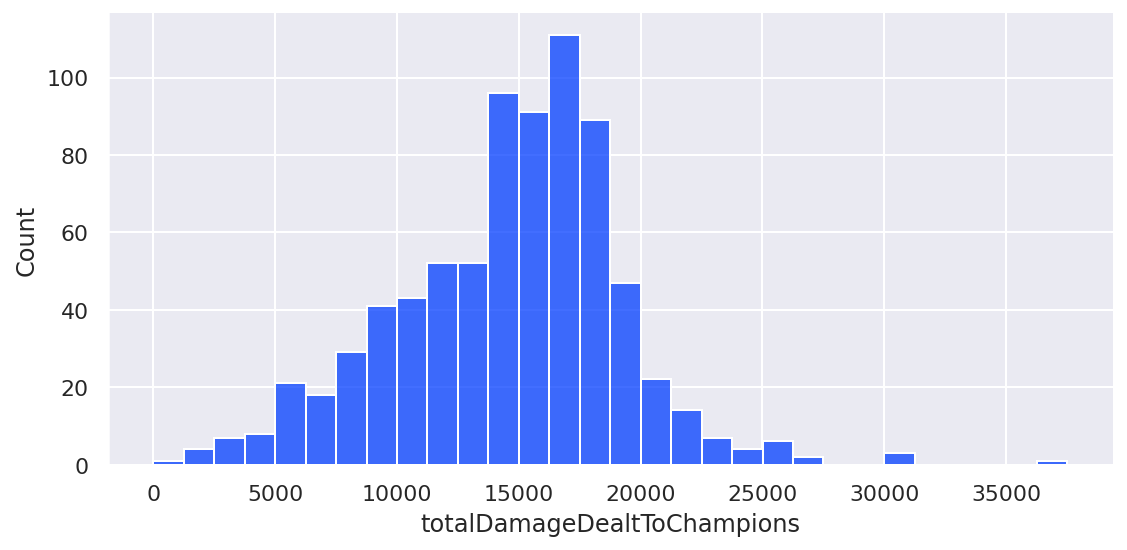

In [56]:
# displot
# distplot은 figure size가 안먹혀서 displot으로 heigt, aspect로 설정가능
sns.displot(group_data['totalDamageDealtToChampions'], height=4, aspect=2)
plt.show()

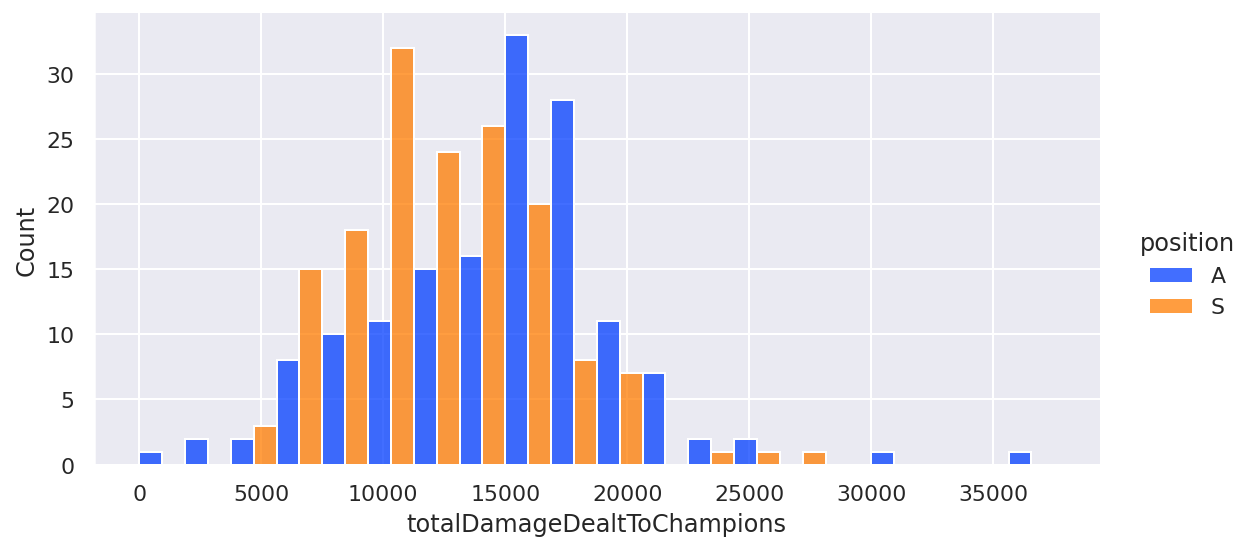

In [57]:
# displot
sns.displot(group_data[group_data['position'].isin(['A','S'])], 
            x = 'totalDamageDealtToChampions', hue='position', multiple='dodge', height=4, aspect=2)
plt.show()

In [59]:
# 챔피언별 level당 stat 정보 등
champ_stats = pd.read_csv('champ_stats.csv')

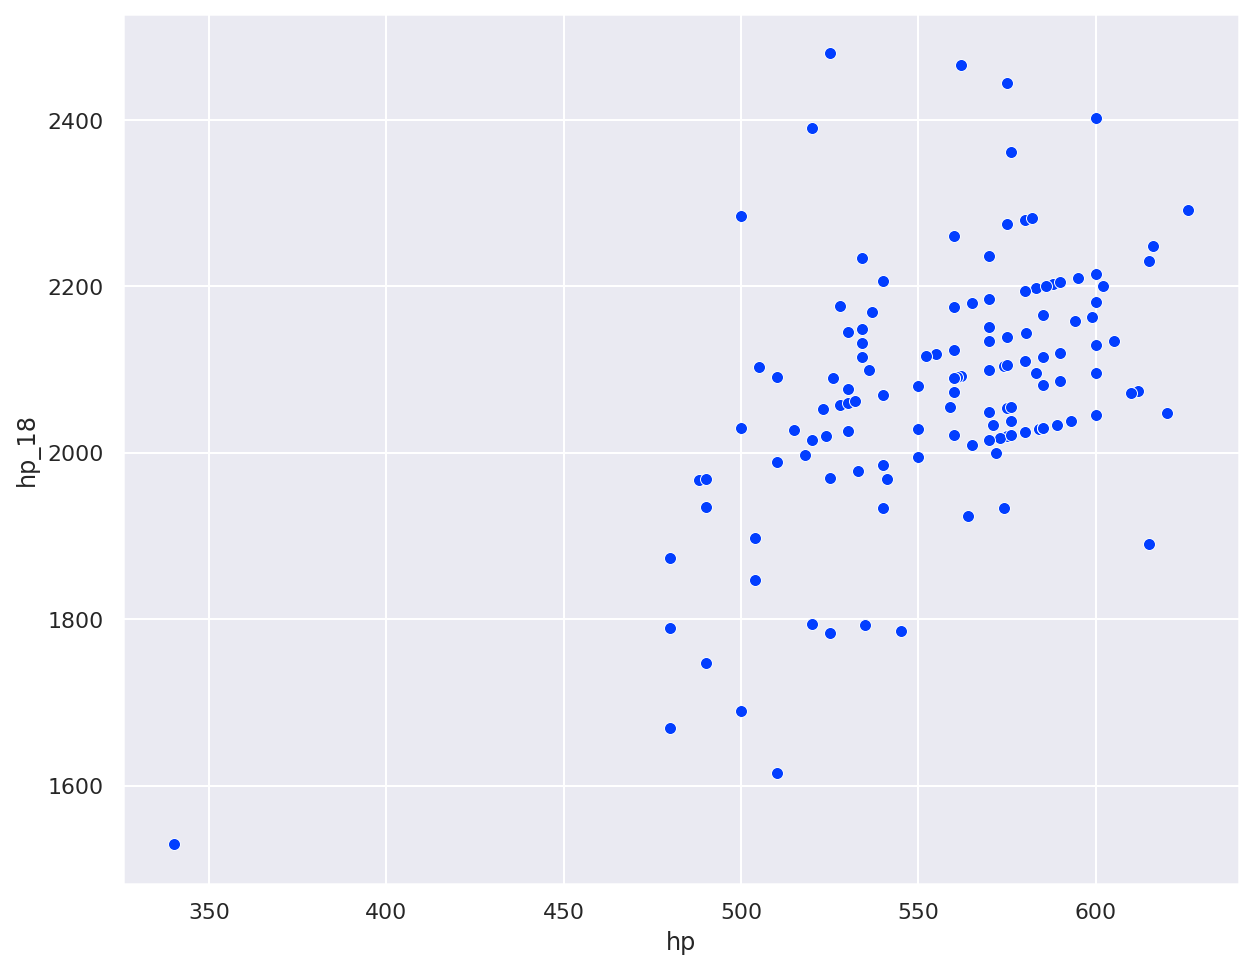

In [60]:
# scatterplot
sns.scatterplot(data=champ_stats, x='hp', y='hp_18')
plt.show()

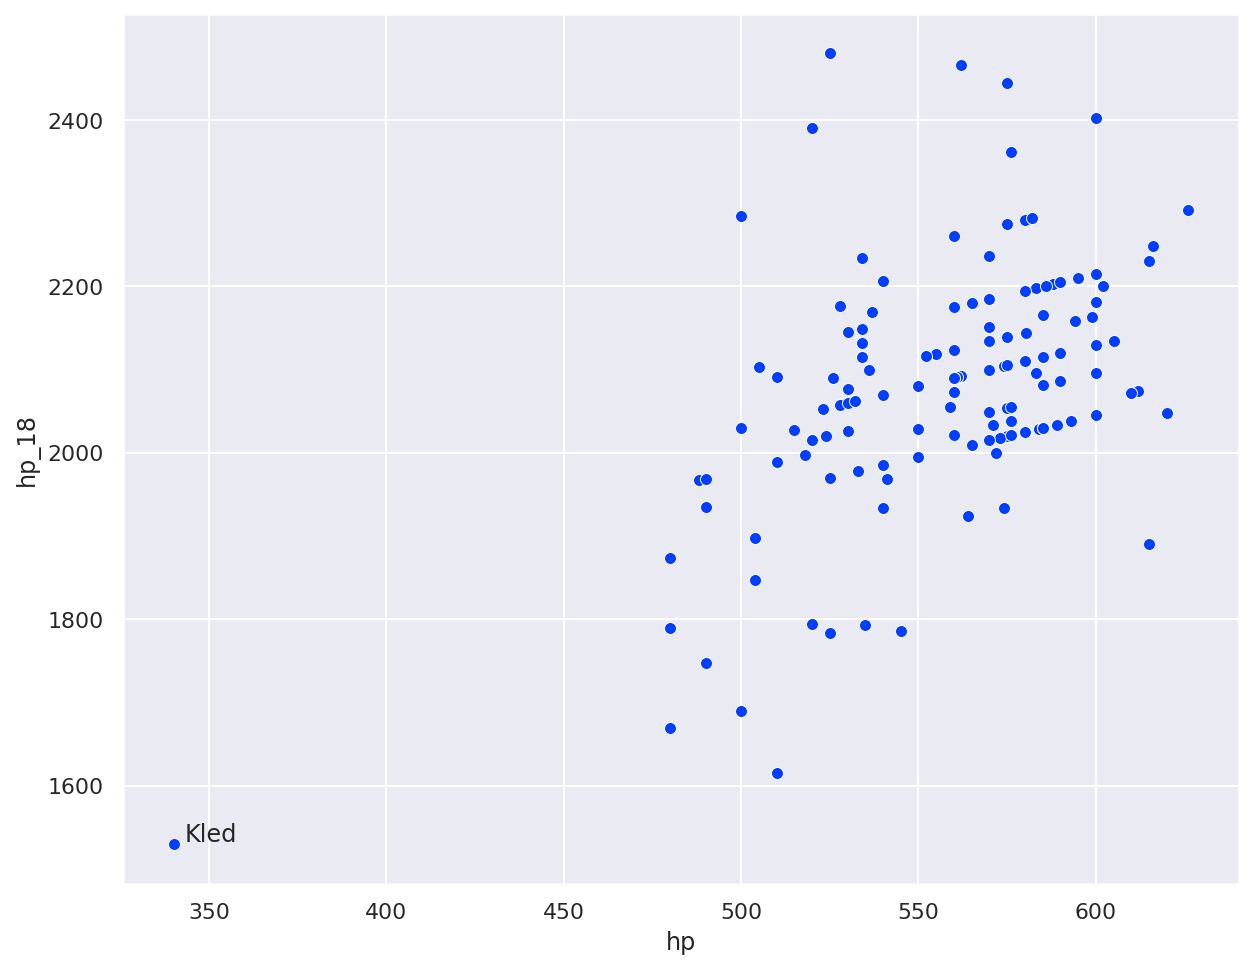

In [61]:
# text 삽입
sns.scatterplot(data=champ_stats, x='hp', y='hp_18')

plt.text(x = champ_stats[champ_stats['championName'] == 'Kled']['hp'] + 3,
         y = champ_stats[champ_stats['championName'] == 'Kled']['hp_18'] + 3,
         s = 'Kled')

plt.show()

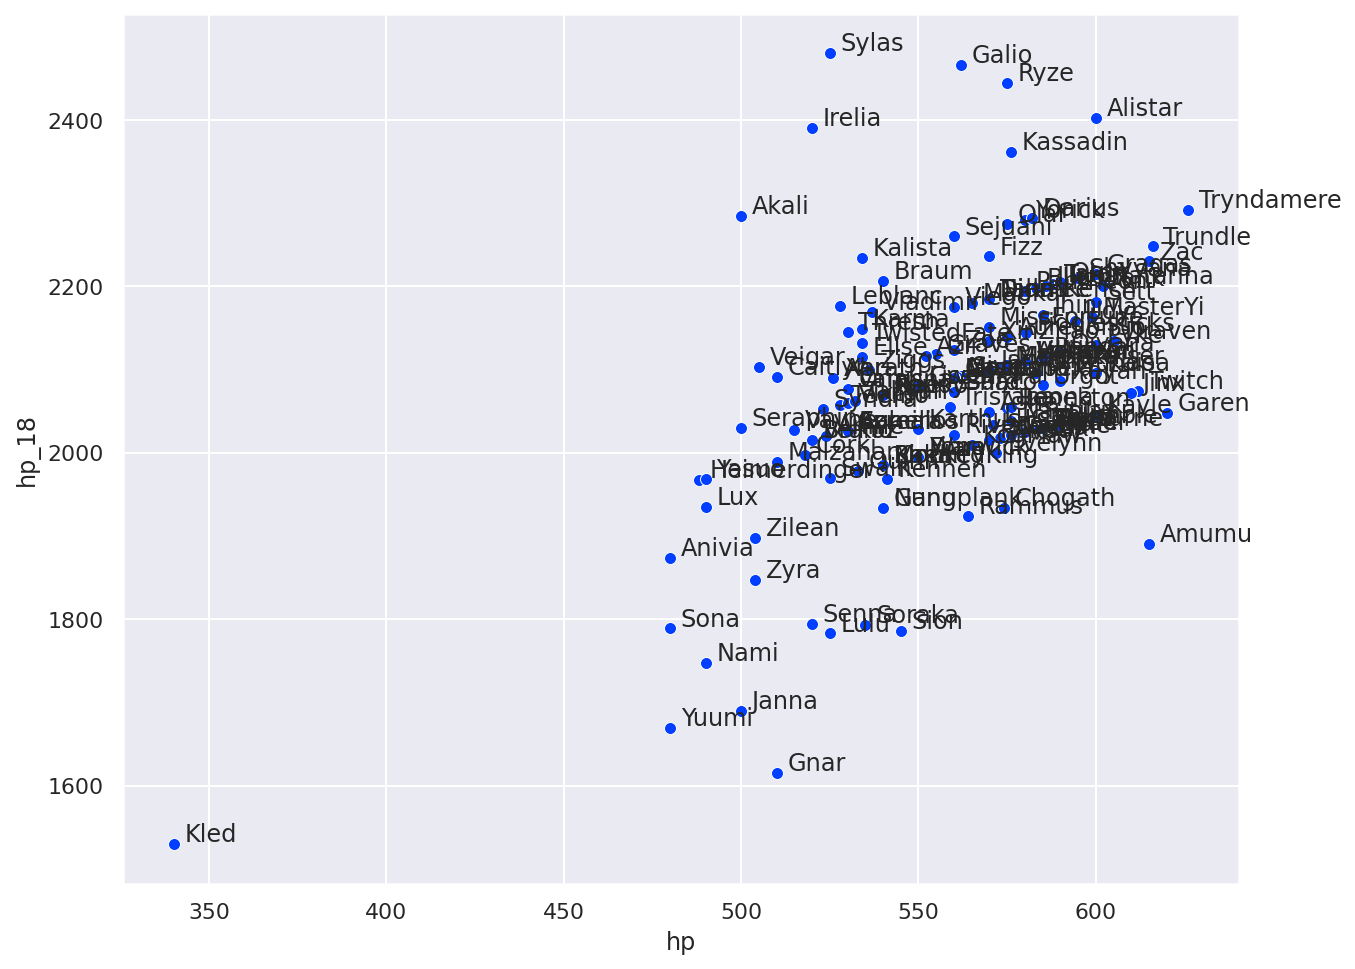

In [62]:
# 모든 챔피언 이름 넣기
sns.scatterplot(data=champ_stats, x='hp', y='hp_18')

for name in champ_stats['championName'].values:
    plt.text(x = champ_stats[champ_stats['championName'] == name]['hp'] + 3,
             y = champ_stats[champ_stats['championName'] == name]['hp_18'] + 3,
             s = name)

plt.show()

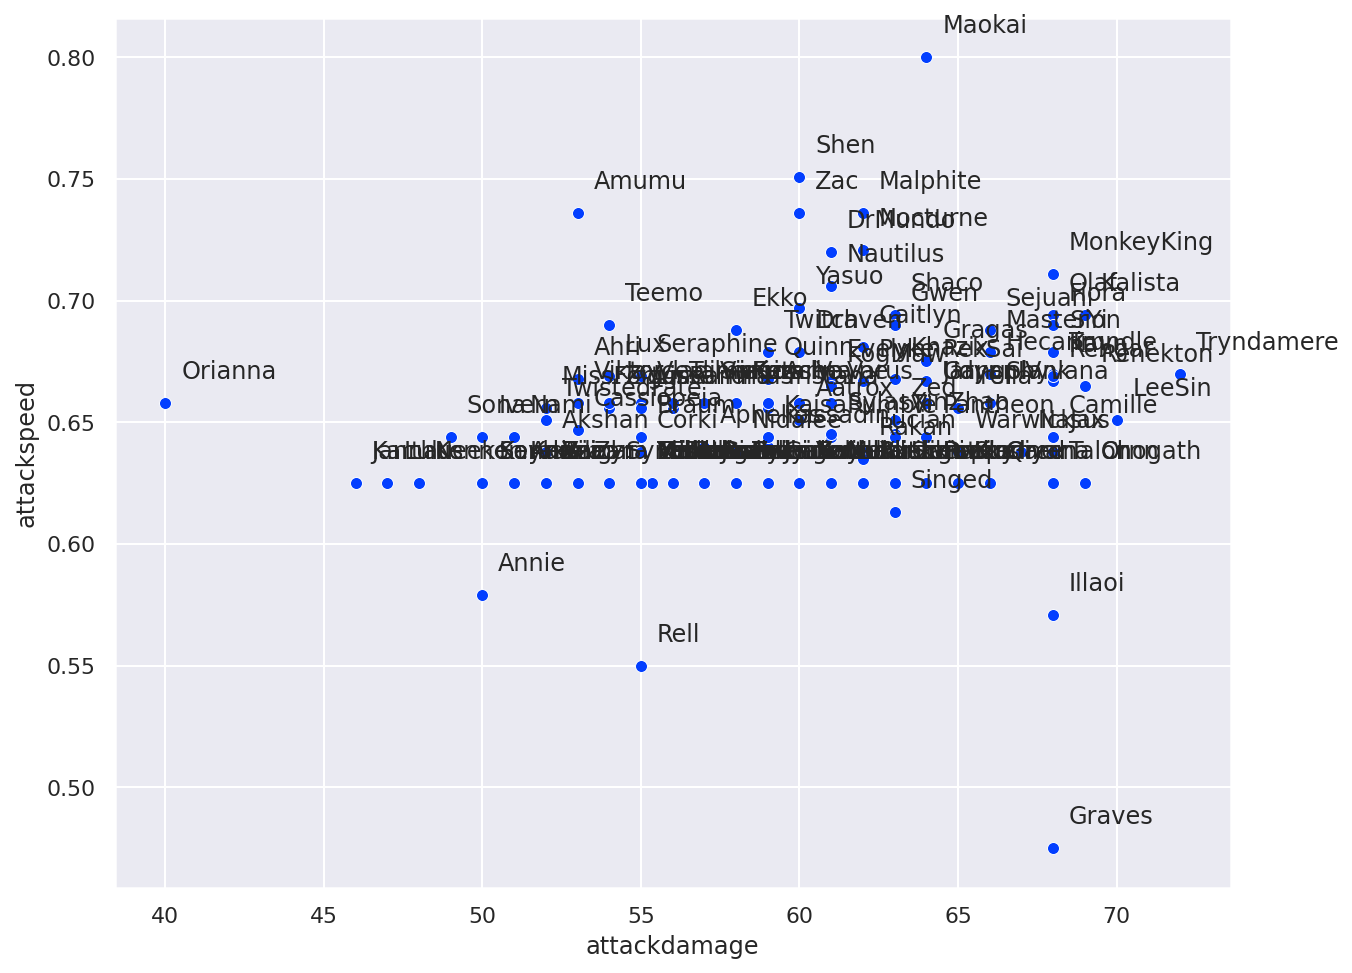

In [63]:
# 공격력과 공격속도
sns.scatterplot(data=champ_stats, x='attackdamage', y='attackspeed')

for name in champ_stats['championName'].values:
    plt.text(x = champ_stats[champ_stats['championName'] == name]['attackdamage'] + 0.5,
             y = champ_stats[champ_stats['championName'] == name]['attackspeed'] + 0.01,
             s = name)

plt.show()

In [ ]:
### ward

In [64]:
# 승리여부 1,0으로 변환
data = data[["wardPlaced", "result"]]
data["result"] = data["result"].apply(lambda x: 1 if x=="WIN" else 0)

In [66]:
# 승률 계산
def count_sum(x):
    win_rate = x['result'].sum() / x['result'].count()
    
    return pd.Series(win_rate, index=["win_rate"])

temp = data.groupby("wardPlaced", as_index=False).apply(count_sum)

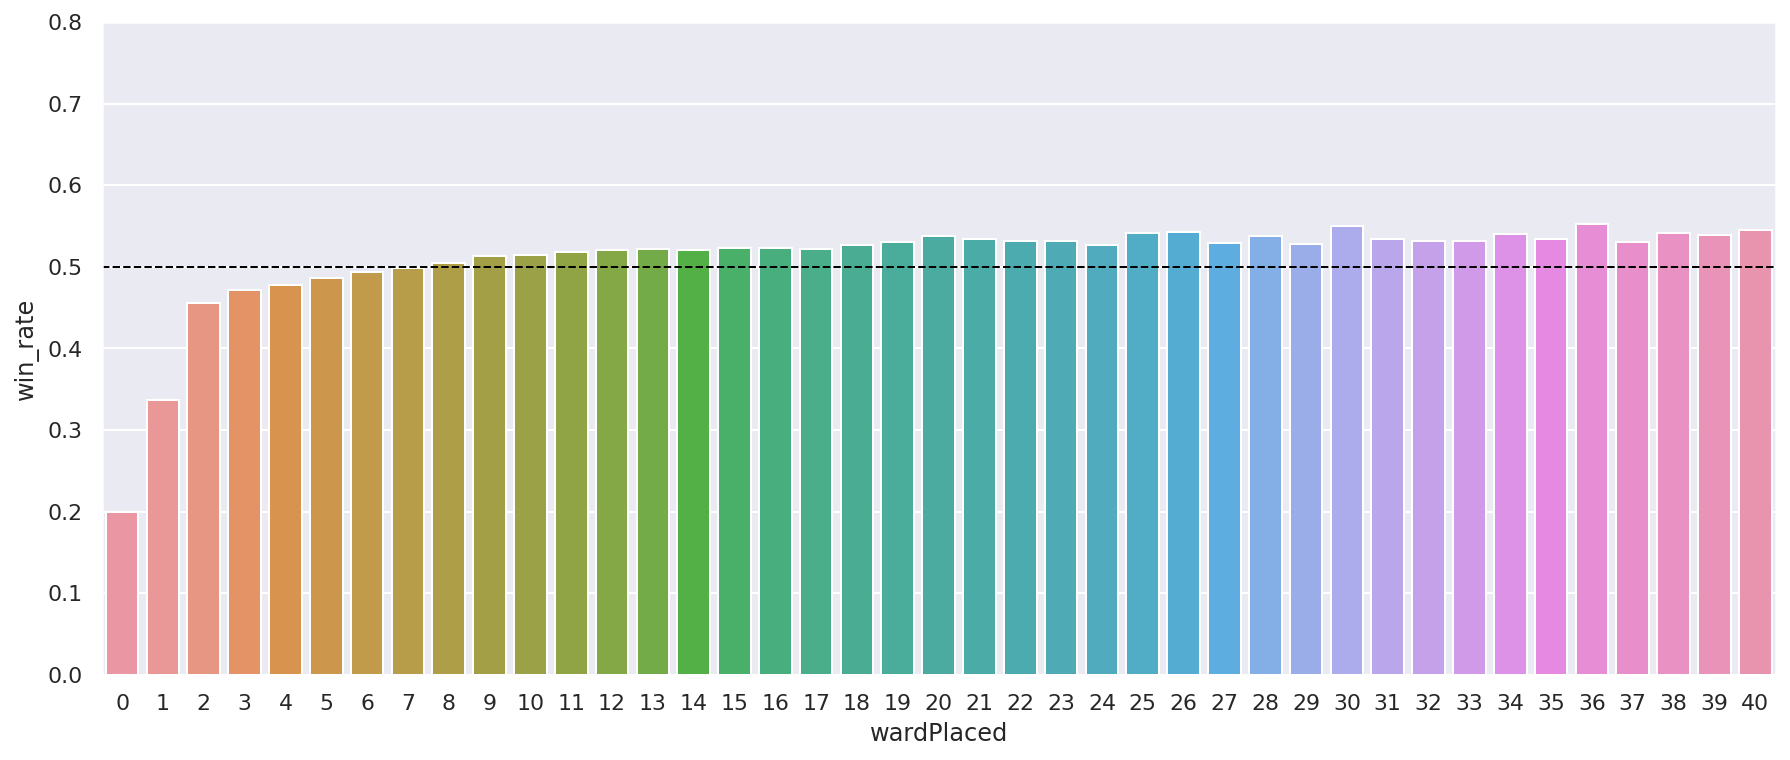

In [67]:
# 와드수 40개 이하만
temp_ward40 = temp[temp["wardPlaced"] <= 40]

# bar chart
fig, axs = plt.subplots(1,1, figsize=(15,6))

sns.barplot(data = temp_ward40, x = "wardPlaced", y = "win_rate", ci = None, ax= axs)
axs.axhline(0.5, ls='--', lw=1, color='black')
axs.set_ylim(0,0.8)

plt.show()